In [10]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split

In [11]:
housing = pd.read_csv('housing.csv')

In [12]:
#Проведите преобразование категориального признака ocean_proximity через OneHot или Dummy-кодировку
housing = pd.get_dummies(housing, columns = ['ocean_proximity'])

In [13]:
#Замените признаки total_rooms и total_bedrooms на average_rooms и average_bedrooms (поделив на households).
housing['average_rooms'] = housing['total_rooms']/housing['households']
housing = housing.drop('total_rooms', axis=1)
housing['average_bedrooms'] = housing['total_bedrooms']/housing['households']
housing = housing.drop('total_bedrooms', axis=1)
housing

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,average_rooms,average_bedrooms
0,-122.23,37.88,41.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0,6.984127,1.023810
1,-122.22,37.86,21.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0,6.238137,0.971880
2,-122.24,37.85,52.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0,8.288136,1.073446
3,-122.25,37.85,52.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0,5.817352,1.073059
4,-122.25,37.85,52.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0,6.281853,1.081081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0,5.045455,1.133333
20636,-121.21,39.49,18.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0,6.114035,1.315789
20637,-121.22,39.43,17.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0,5.205543,1.120092
20638,-121.32,39.43,18.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0,5.329513,1.171920


In [14]:
# В признаке average_bedrooms (total_bedrooms) есть отсутствующие значения. 
# Определите число экземпляров данных, для которых этот признак отсутствует. 
sum(housing['average_bedrooms'].isnull())

207

In [15]:
#Разбейте датасет на тренировочную, валидационную и тестовую выборку
housing_train_val, housing_test =  train_test_split( housing, test_size =0.1)
housing_train, housing_val =  train_test_split( housing_train_val, test_size =0.1)

In [16]:
#Придумайте и обоснуйте стратегию заполнения пропусков в этой задаче. Заполните пропуски.
train_without_null = housing_train.dropna()
X_y_train = train_without_null.drop('median_house_value',axis=1)
X = X_y_train.drop('average_bedrooms',axis=1)
y = X_y_train['average_bedrooms']

In [17]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)

In [18]:
htrn = housing_train['average_bedrooms'].isnull()
httn = housing_test['average_bedrooms'].isnull()
hvn = housing_val['average_bedrooms'].isnull()

In [19]:
housing_train.loc[htrn,'average_bedrooms'] = reg.predict(housing_train.loc[htrn].drop('median_house_value',axis=1).drop('average_bedrooms',axis=1))
housing_test.loc[httn,'average_bedrooms'] = reg.predict(housing_test.loc[httn].drop('median_house_value',axis=1).drop('average_bedrooms',axis=1))
housing_val.loc[hvn,'average_bedrooms'] = reg.predict(housing_val.loc[hvn].drop('median_house_value',axis=1).drop('average_bedrooms',axis=1))

In [20]:
sum(housing_train['average_bedrooms'].isnull())


0

In [21]:
# Нормализуйте признаки longitude и latitude 
# (сделайте так, чтобы каждый признак имел среднее значение 0 и дисперсию 1 внутри обучающей выборки)

train_mean_lon = np.mean(housing_train['longitude'])
housing_train['longitude'] -= train_mean_lon
train_disp_lon = np.std(housing_train['longitude'])
housing_train['longitude'] /= train_disp_lon

train_mean_lat = np.mean(housing_train['longitude'])
housing_train['latitude'] -= train_mean_lat
train_disp_lat = np.std(housing_train['longitude'])
housing_train['latitude'] /= train_disp_lat


housing_test['longitude'] -= train_mean_lon
housing_test['longitude'] /= train_disp_lon
housing_test['latitude'] -= train_mean_lat
housing_test['latitude'] /= train_disp_lat

housing_val['longitude'] -= train_mean_lon
housing_val['longitude'] /= train_disp_lon
housing_val['latitude'] -= train_mean_lat
housing_val['latitude'] /= train_disp_lat

print(np.mean(housing_train['longitude']))
print(np.std(housing_train['longitude']))
print(np.mean(housing_test['longitude']))
print(np.std(housing_test['longitude']))

-5.419492797799365e-15
1.0
-0.012438068616237656
1.0030751836669012


In [22]:
#2.1
davis = pd.read_csv('Davis.csv')
davis

,Unnamed: 0,sex,weight,height,repwt,repht
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0
...,...,...,...,...,...,...
195,196,M,74,175,71.0,175.0
196,197,M,83,180,80.0,180.0
197,198,M,81,175,NaN,NaN
198,199,M,90,181,91.0,178.0


In [23]:
# Удалите некорректные данные
davis = davis.loc[davis['weight'] > 40]
davis = davis.loc[davis['weight'] < 110]
davis = davis.loc[davis['height'] > 150]
davis['sex'] = davis['sex'].apply(lambda sex: 1 if sex == "M" else 0)
davis

,Unnamed: 0,sex,weight,height,repwt,repht
0,1,1,77,182,77.0,180.0
1,2,0,58,161,51.0,159.0
2,3,0,53,161,54.0,158.0
3,4,1,68,177,70.0,175.0
4,5,0,59,157,59.0,155.0
...,...,...,...,...,...,...
195,196,1,74,175,71.0,175.0
196,197,1,83,180,80.0,180.0
197,198,1,81,175,NaN,NaN
198,199,1,90,181,91.0,178.0


In [24]:
# Выделите тестовую выборку из 50 экземпляров
davis_train, davis_test = train_test_split(davis, test_size = 50)

<AxesSubplot:xlabel='weight', ylabel='Count'>

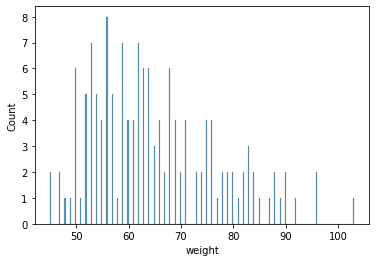

In [25]:
# На тренировочных данных постройте:
#    Гистограмму height
#    Гистограмму weight
#    Эти же гистограммы для разных полов

import seaborn as sns
sns.histplot(davis_train['weight'], binwidth=0.2)

<AxesSubplot:xlabel='height', ylabel='Count'>

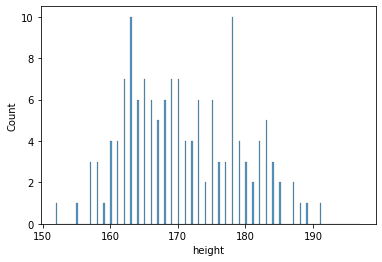

In [26]:
sns.histplot(davis_train['height'], binwidth=0.2)

#Я сначла построила гистограмму, а только после ориентируясь на них выбрала значения для удаления некорректных данных 

<AxesSubplot:xlabel='height', ylabel='Count'>

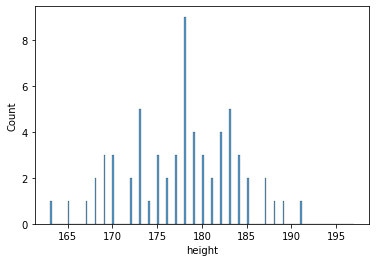

In [27]:
sns.histplot(davis_train.loc[davis_train['sex'] == 1,'height'], binwidth=0.2)

<AxesSubplot:xlabel='weight', ylabel='Count'>

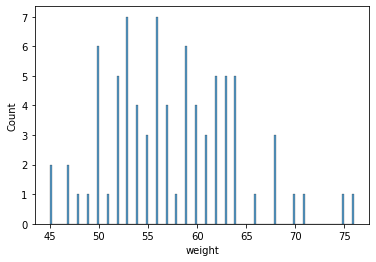

In [28]:
sns.histplot(davis_train.loc[davis_train['sex'] == 0,'weight'], binwidth=0.2)

<AxesSubplot:xlabel='weight', ylabel='Count'>

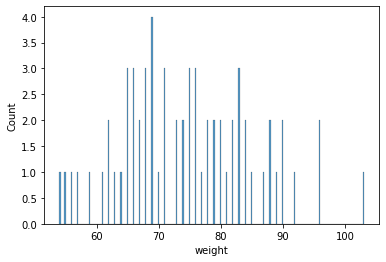

In [29]:
sns.histplot(davis_train.loc[davis_train['sex'] == 1,'weight'], binwidth=0.2)

In [30]:
# На тренировочных данных обучите классификатор пола (sex),
# используя только признаки height и weight. 
# Замерьте производительность на тренировочной и тестовой выборке (через Accuracy).


#Я выбрала модель LogisticRegression

x_train, y_train = davis_train[['height','weight']], davis_train['sex']
x_test, y_test = davis_test[['height','weight']], davis_test['sex']

In [31]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(log_reg.predict(x_train), y_train)

0.8896551724137931

In [37]:
accuracy_score(log_reg.predict(x_test), y_test)

0.96

C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


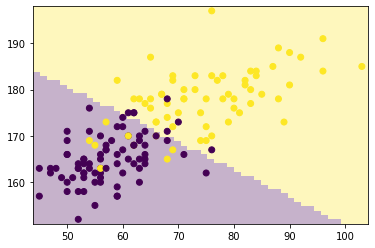

In [38]:
# Отобразите точки из обучающей выборки на плоскости (height-weight).
# Покрасьте их цветами в зависимости от пола.
# Раскрасьте области в зависимости от пола, предсказанного обученным в п.4. классификатором.
# Сделайте аналогичный график на тестовой выборке
import matplotlib.pyplot as plt
x1_min, x1_max = x_train['weight'].min()-0.5, x_train['weight'].max()+0.5
x2_min, x2_max = x_train['height'].min()-0.5, x_train['height'].max()+0.5
xx1,xx2 = np.mgrid[x1_min:x1_max:50j, x2_min:x2_max:50j]
X_pred = np.column_stack([xx2.reshape(-1),xx1.reshape(-1) ])
y_pred = log_reg.predict(X_pred)
plt.pcolormesh(xx1,xx2, y_pred.reshape(xx1.shape), alpha=0.3, shading='auto')
plt.scatter(x_train['weight'], x_train['height'], c = y_train)
plt.show()

C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


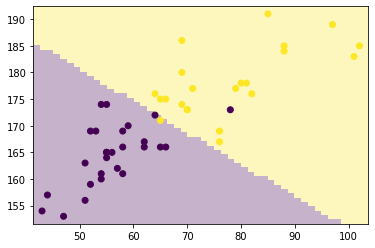

In [39]:
#Aналогичный график на тестовой выборке
x1_min, x1_max = x_test['weight'].min()-1, x_test['weight'].max()+1
x2_min, x2_max = x_test['height'].min()-1, x_test['height'].max()+1
xx1,xx2 = np.mgrid[x1_min:x1_max:50j, x2_min:x2_max:50j]
X_pred = np.column_stack([xx2.reshape(-1),xx1.reshape(-1) ])
y_pred = log_reg.predict(X_pred)
plt.pcolormesh(xx1,xx2, y_pred.reshape(xx1.shape), alpha=0.3, shading='auto')
plt.scatter(x_test['weight'], x_test['height'], c = y_test)
plt.show()

In [40]:
#2.2
ccpp = pd.read_excel('CCPP.xlsx')
ccpp

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [41]:
# Возьмите данные с листа 1 и выделите валидационную и тестовую выборку.
ccpp_train_val, ccpp_test = train_test_split(ccpp, test_size=0.1)
ccpp_train, ccpp_val = train_test_split(ccpp_train_val, test_size=0.1)

In [42]:
# Постройте регрессионную модель. 
# Замерьте коэффициент  и среднюю ошибку предсказания на валидационной выборке.

reg = LinearRegression()

In [43]:
X_train = ccpp_train.drop("PE",axis=1)
y_train = ccpp_train['PE']

In [44]:
reg.fit(X_train, y_train)

LinearRegression()

In [45]:
# Замерьте коэффициент r^2 и среднюю ошибку предсказания на валидационной выборке.
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
r2_score(ccpp_val['PE'], reg.predict(ccpp_val.drop("PE",axis=1)))

0.9326116993311139

In [46]:
mean_absolute_error(ccpp_val['PE'], reg.predict(ccpp_val.drop("PE",axis=1)))

3.5924407446334774

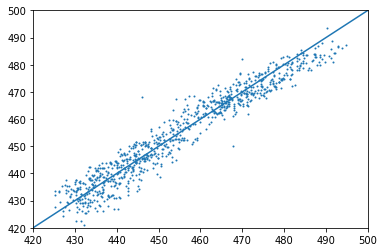

In [47]:
# Постройте точки из валидационной выборки на плоскости (t=истинное значение, y=предсказание модели).
# Отобразите вместе с ними прямую y=t. 
ax = plt.gca()
ax.cla()
ax.set_xlim((420, 500))
ax.set_ylim((420, 500))
plt.scatter(ccpp_val['PE'], reg.predict(ccpp_val.drop("PE",axis=1)), s = 1)
plt.plot(np.linspace(0,500),np.linspace(0,500))